### In this project we are going to wrangle, plot and model geospatial data of Canadian provinces with geopandas

In [1]:
#let import the libraries we are going to use

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#reading of shapefiles + cordinate system

provinces = gpd.read_file("lpr_000b16a_e.shp")
provinces = provinces.to_crs("EPSG:4326")  
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-88.86612 56.84777, -88.86838 ..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((-94.82341 59.99352, -94.82398 ..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((-109.63750 60.00006, -109.62500 60.0..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((-110.00000 59.95257, -110.00000 59.9..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


In [3]:
#lets check the data data of the imported shapefile

type(provinces)

geopandas.geodataframe.GeoDataFrame

In [4]:
provinces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PRUID     13 non-null     object  
 1   PRNAME    13 non-null     object  
 2   PRENAME   13 non-null     object  
 3   PRFNAME   13 non-null     object  
 4   PREABBR   13 non-null     object  
 5   PRFABBR   13 non-null     object  
 6   geometry  13 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 856.0+ bytes


In [5]:
#There are 5 columns of dtype “object” which is similar to “strings” in pandas, and one “geometry” column which contains vector data (polygons)

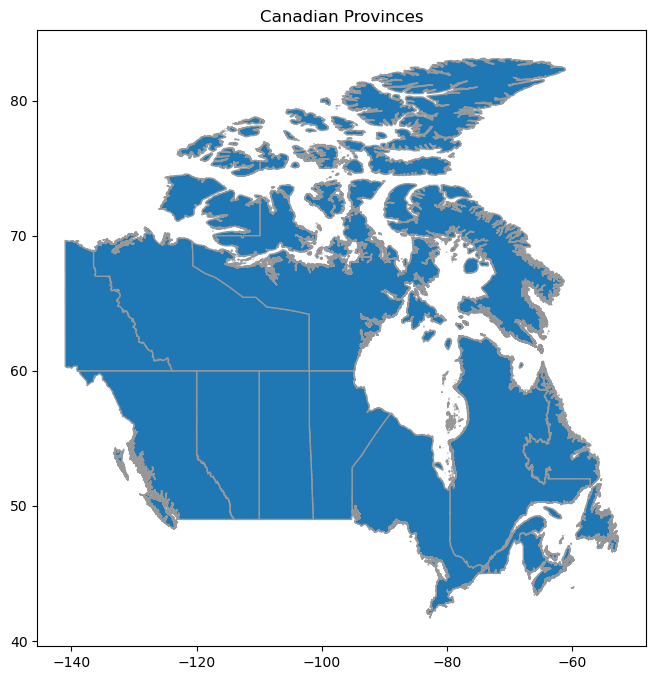

In [6]:
#lets take a look at the shapefile

provinces.plot(edgecolor="0.6", figsize=(10, 8))
plt.title("Canadian Provinces");

In [7]:
provinces.iloc[[0,1]]

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."


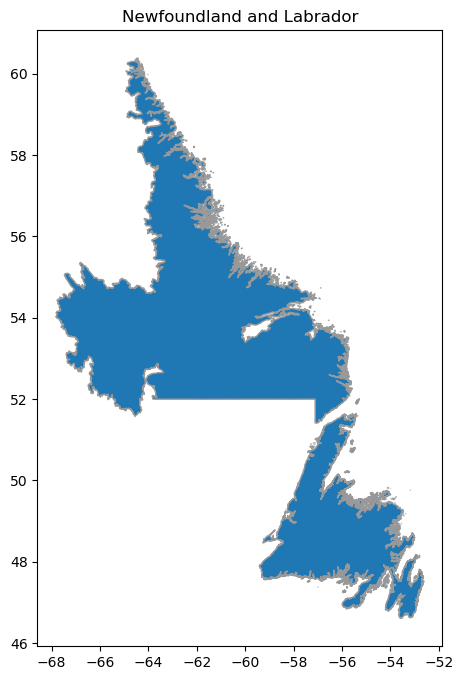

In [8]:
#indexing + plotting
name = provinces.iloc[0]["PRENAME"]
provinces.iloc[[0]].plot(edgecolor="0.6", figsize=(10, 8))
plt.title(name);

In [9]:
#.query() method is used to query the row to extract only the related properties of British Columbia

province_bc = "British Columbia"
bc = provinces.query("PRENAME == @province_bc").copy()
bc

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


In [10]:
bc = (bc.loc[:, ["PRENAME", "geometry"]]
        .rename(columns={"PRNAME": "Province"})
        .reset_index(drop=True)
      )
bc

,PRENAME,geometry
0,British Columbia,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


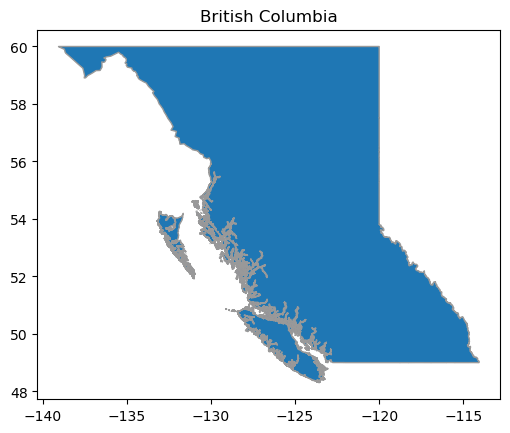

In [11]:
bc.plot(edgecolor="0.6")
plt.title("British Columbia");

#### Working with data from OpenstreetMap

In [12]:
# first we are going import data from an online source using an API, in this case we are going to use OSMnx
#OSMnx is a Python package that lets you download geospatial data from OpenStreetMap and model, project, visualize, and analyze real-world street networks and any other geospatial geometries.

#conda install -c conda-forge osmnx

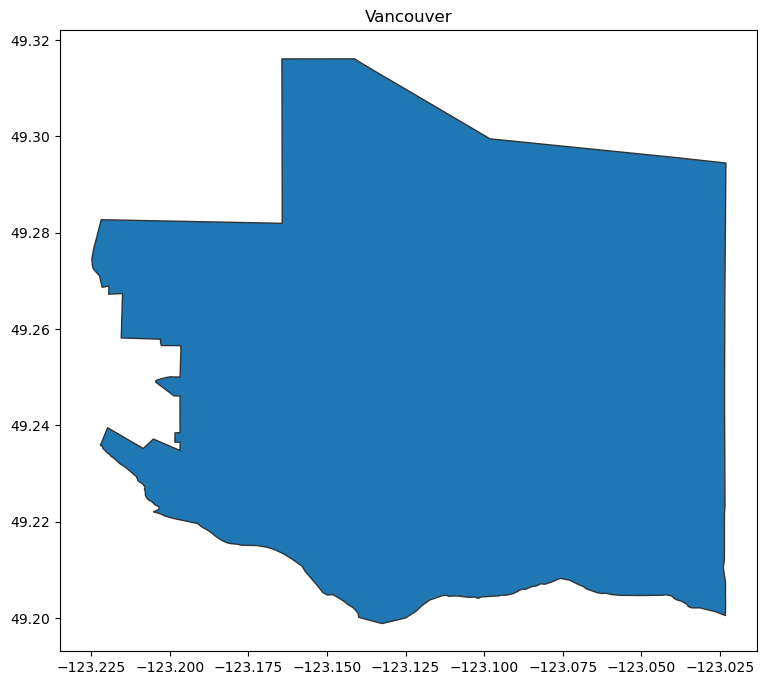

In [13]:
import osmnx as ox

vancouver = ox.geocode_to_gdf("Vancouver, Canada")
vancouver.plot(edgecolor="0.2",figsize=(9,9))
plt.title("Vancouver");

### wrangling operation

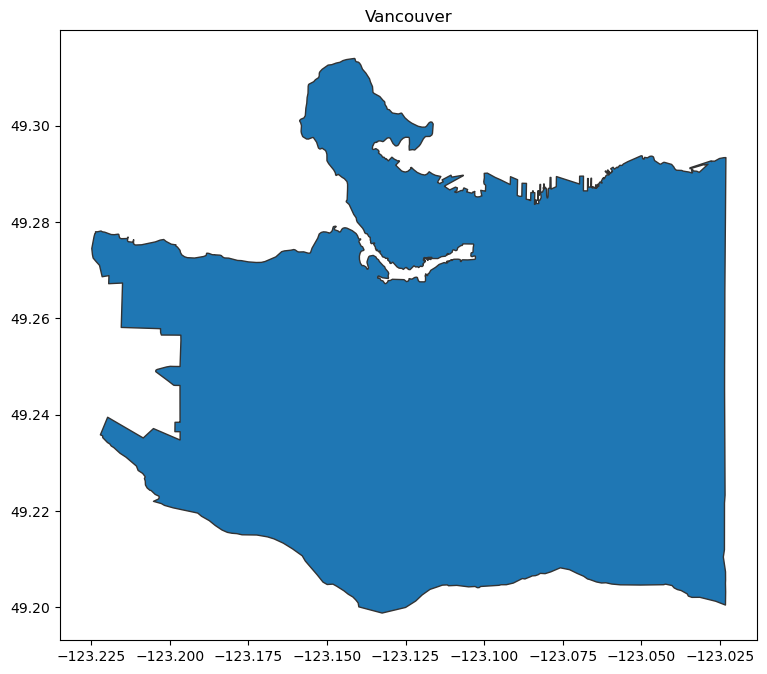

In [14]:
#let’s use this polygon to “clip” a section of our higher-resolution provinces data which we downloaded earlier.
van_bc = gpd.clip(bc, vancouver)
van_bc.plot(edgecolor="0.2",figsize=(9,9))
plt.title("Vancouver");

In [15]:
stanley_park = ox.geocode_to_gdf("Stanley Park, Vancouver")

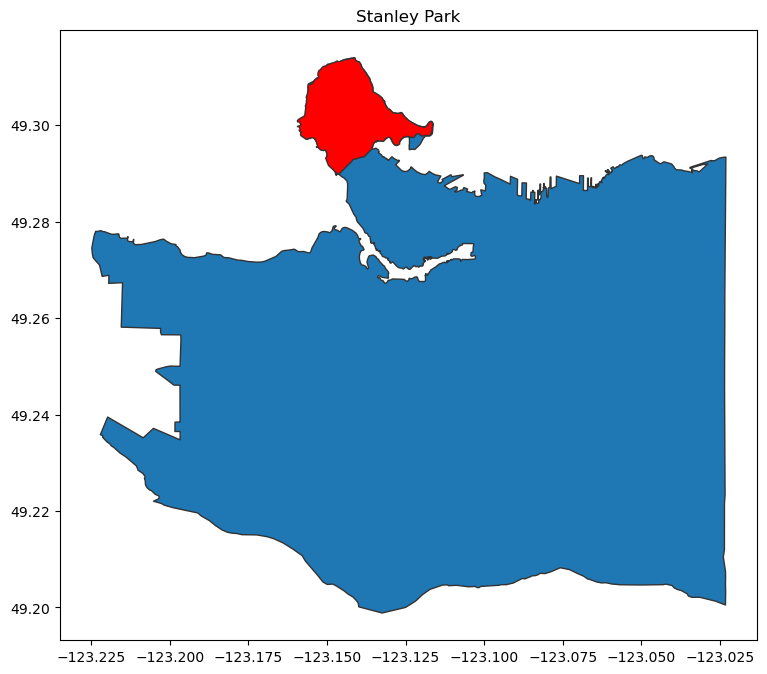

In [16]:
ax = van_bc.plot(edgecolor="0.2", figsize=(9,9))
stanley_park.plot(ax=ax, edgecolor="0.2", color="red")
plt.title("Stanley Park");

In [17]:
# we can also grab the bicycle network within Stanley Park using the function ox.graph_from_place()
bike_network = ox.graph_from_place("Stanley Park, Vancouver",
                                   network_type="bike")
bike_network

C:\Users\chuka\OneDrive\Documents\anaconda2\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)
C:\Users\chuka\OneDrive\Documents\anaconda2\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


In [18]:
#We’re not interested in graph operations, we are just interested in geometries, so we’ll convert this to a GeoDataFrame using the function ox.graph_to_gdfs()
bike_network = (ox.graph_to_gdfs(bike_network, nodes=False)
                  .reset_index(drop=True)
                  .loc[:, ["name", "length", "bridge", "geometry"]]
               )
bike_network

,name,length,bridge,geometry
0,Stanley Park Causeway,165.216,yes,"LINESTRING (-123.13719 49.29767, -123.13718 49..."
1,Stanley Park Causeway,62.901,NaN,"LINESTRING (-123.13719 49.29767, -123.13741 49..."
2,NaN,8.066,NaN,"LINESTRING (-123.13211 49.29737, -123.13212 49..."
3,Stanley Park Drive,80.488,NaN,"LINESTRING (-123.13211 49.29737, -123.13199 49..."
4,NaN,91.001,NaN,"LINESTRING (-123.13211 49.29737, -123.13212 49..."
...,...,...,...,...
424,Stanley Park Seawall Bike Path,1023.824,NaN,"LINESTRING (-123.13466 49.29680, -123.13451 49..."
425,NaN,30.393,NaN,"LINESTRING (-123.13625 49.30091, -123.13667 49..."
426,NaN,4.102,NaN,"LINESTRING (-123.13173 49.30403, -123.13170 49..."
427,Stanley Park Drive,429.670,NaN,"LINESTRING (-123.13173 49.30403, -123.13195 49..."


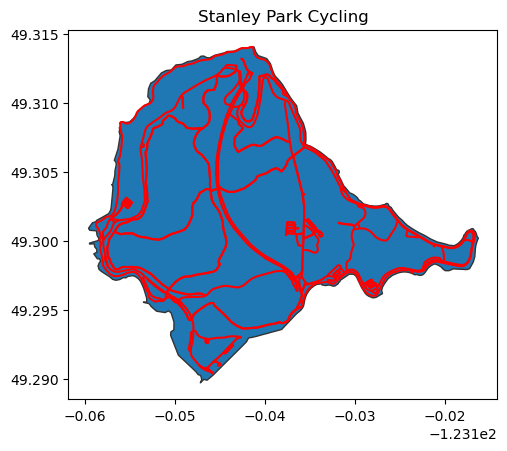

In [19]:
#lets see the plot
ax = stanley_park.plot(edgecolor="0.2")
bike_network.plot(ax=ax, edgecolor="0.2", color="red")
plt.title("Stanley Park Cycling");

In [20]:
## Basic Data wrangling

In [21]:
#let check the total length of bike lanes in Stanley Park 

total_length = bike_network["length"].sum()
print(f"Total bike lane length: {total_length / 1000:.0f}km")

Total bike lane length: 59km


In [22]:
# we could still calculate lengths based on our line geometries and the .length
bike_network["geometry"]

0      LINESTRING (-123.13719 49.29767, -123.13718 49...
1      LINESTRING (-123.13719 49.29767, -123.13741 49...
2      LINESTRING (-123.13211 49.29737, -123.13212 49...
3      LINESTRING (-123.13211 49.29737, -123.13199 49...
4      LINESTRING (-123.13211 49.29737, -123.13212 49...
                             ...                        
424    LINESTRING (-123.13466 49.29680, -123.13451 49...
425    LINESTRING (-123.13625 49.30091, -123.13667 49...
426    LINESTRING (-123.13173 49.30403, -123.13170 49...
427    LINESTRING (-123.13173 49.30403, -123.13195 49...
428    LINESTRING (-123.13170 49.30406, -123.13173 49...
Name: geometry, Length: 429, dtype: geometry

In [23]:
bike_network = bike_network.to_crs("EPSG:3347")
bike_network["geometry"].length

0       165.142206
1        62.941716
2         8.058879
3        80.580578
4        91.110800
          ...     
424    1024.698076
425      30.450219
426       4.100878
427     429.809145
428       4.100878
Length: 429, dtype: float64

In [24]:
total_length = bike_network["geometry"].length.sum()
print(f"Total bike lane length: {total_length / 1000:.0f}km")

Total bike lane length: 59km


In [25]:
#looks cool, the geometry and lenght gave the same value

### working with raster data

In [26]:
#we can also work with raster data in geopandas
#first lets import the rasterio library 
import rasterio

In [27]:
# we have a satellite image raster file of UBC which we care going to use for this exercise
dataset = rasterio.open("481E_5456N/481E_5456N.tif")

In [28]:
#lets check the width and height (in pixels/cells) of the raster
print(f"Width: {dataset.width} pixels")
print(f"Height: {dataset.height} pixels")

Width: 10000 pixels
Height: 10000 pixels


In [29]:
#This particular satellite image has 4 bands which we can check by using the count method
dataset.count

4

In [30]:
#let us see the first band
band1 = dataset.read(1)
band1

array([[ 70,  67,  52, ...,  88,  86,  85],
       [ 64,  60,  53, ...,  89,  88,  92],
       [ 67,  63,  62, ...,  93, 104, 107],
       ...,
       [ 58,  56,  54, ...,  52,  28,  20],
       [ 55,  56,  55, ...,  55,  30,  25],
       [ 54,  57,  59, ...,  30,  19,  29]], dtype=uint8)

In [31]:
#before importing the data, lets e<rduce the size of the data to speed things up a bit 
rescale_factor = 0.5
scaled_data = dataset.read(out_shape=(dataset.count, int(dataset.height * rescale_factor),
                                      int(dataset.width * rescale_factor))
                          )
print(f"Scaled shape: {scaled_data.shape}")

Scaled shape: (4, 5000, 5000)


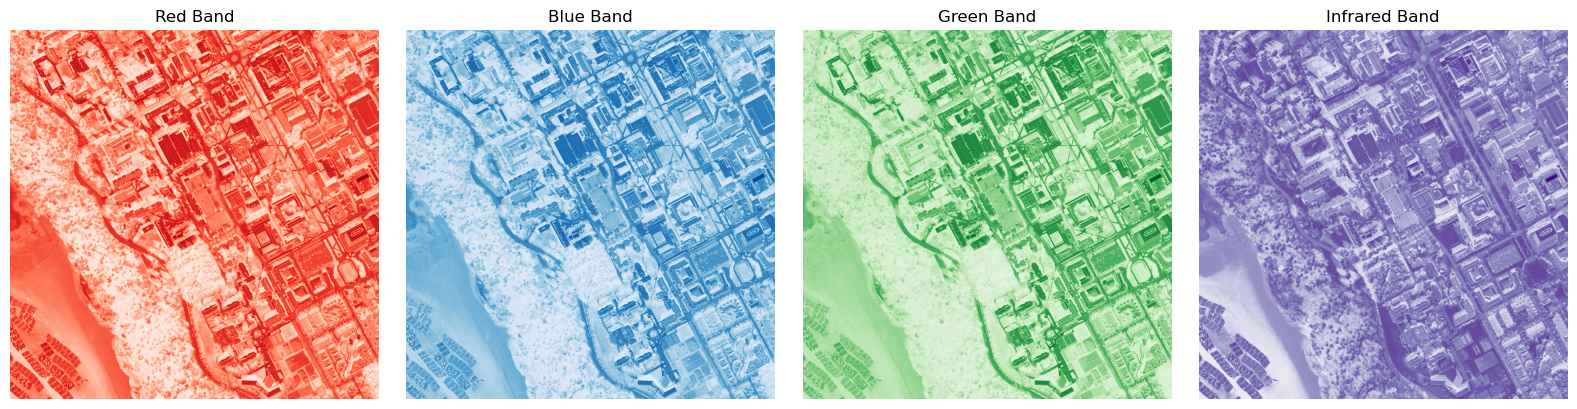

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
cmaps = ["Reds", "Blues", "Greens", "Purples"]
bands = ["Red Band", "Blue Band", "Green Band", "Infrared Band"]
for band in [0, 1, 2, 3]:
    ax[band].imshow(scaled_data[band, :, :], cmap=cmaps[band])
    ax[band].set_title(bands[band])
    ax[band].axis("off")
plt.tight_layout();

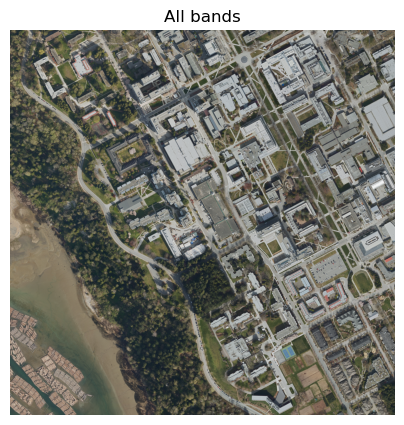

In [33]:
#all bands
plt.figure(figsize=(5, 5))
plt.imshow(np.moveaxis(scaled_data, 0, -1)[:, :, :3])
plt.axis("off")
plt.title("All bands");